# <font color = gree>PRDL & MLLB courses ETSIT - UPM</font>
> <font color=orange size= 4>Simple example using a Tree for extreme OSA classification</font>
---


* ### We will use the data in: OSA_extreme_male.xlsx</font>




---
---
Load : OSA_extreme_male.xlsx  from your Laptop



In [24]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving OSA_extreme_male.xlsx to OSA_extreme_male (1).xlsx
User uploaded file "OSA_extreme_male (1).xlsx" with length 19282 bytes


In [25]:
ls

'OSA_extreme_male (1).xlsx'   OSA_extreme_male.xlsx   sample_data/


---

### Read the *OSA_extreme_male.xlsx* file

In [26]:
# Import pandas
import pandas as pd

# Read OSA_DB_UPM.xlsx
df_OSA_male_extreme = pd.read_excel("OSA_extreme_male.xlsx")


In [27]:
df_OSA_male_extreme.head(10)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI
0,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927
1,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906
2,P0007,hombre,34.0,86,169,39,42,Severe,30.110991
3,P0008,hombre,60.0,145,172,47,44,Severe,49.012980
4,P0013,hombre,3.7,90,180,36,40,Healthy,27.777778
5,P0020,hombre,4.3,89,171,44,45,Healthy,30.436716
6,P0022,hombre,56.0,113,177,33,46,Severe,36.068818
7,P0024,hombre,53.6,107,170,48,46,Severe,37.024221
8,P0025,hombre,2.1,70,174,53,38,Healthy,23.120624
9,P0027,hombre,47.0,100,180,62,48,Severe,30.864198


* # FOR SIMPLYCITY and Visualization, we will ONLY use TWO features: Age and BMI

In [28]:
### Picking predictor columns

# Get all the columns from the dataframe.
columns = df_OSA_male_extreme.columns.tolist()

# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["Patient","Gender","IAH","OSA", "Cervical", "Weight", "Height"]]

# Store the variable we'll be predicting on.
target = "OSA"

print('Predictors: ',columns)

Predictors:  ['Age', 'BMI']


## We will use data (our features) as Numpy arrays

In [29]:
import numpy as np

X = np.array(df_OSA_male_extreme[columns])


In [30]:
X.shape

(278, 2)

In [47]:
(df_OSA_male_extreme["OSA"])

0      0
1      0
2      1
3      1
4      0
      ..
273    1
274    0
275    1
276    0
277    1
Name: OSA, Length: 278, dtype: int64

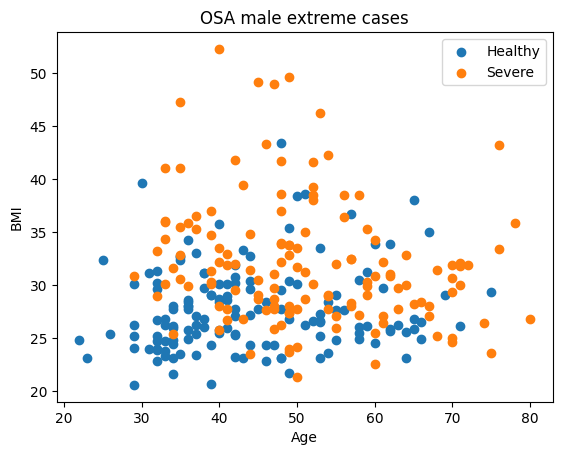

In [56]:
plt.scatter(df_OSA_male_extreme[(df_OSA_male_extreme["OSA"]==0)]["Age"],
            df_OSA_male_extreme[(df_OSA_male_extreme["OSA"]==0)]["BMI"])
plt.scatter(df_OSA_male_extreme[(df_OSA_male_extreme["OSA"]==1)]["Age"],
            df_OSA_male_extreme[(df_OSA_male_extreme["OSA"]==1)]["BMI"])
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("OSA male extreme cases")
plt.legend(["Healthy","Severe"])

# Trees usualy <font color=red>Don't need </font>feature normalization

# The outcome "y" will have two values: binary classification

* # we can map "Healthy" to "0" and "Severe" to "1"

In [31]:
df_OSA_male_extreme.OSA = df_OSA_male_extreme.OSA.map({'Healthy': 0, 'Severe': 1})

In [32]:
y = np.array(df_OSA_male_extreme['OSA'])

# For this example we will follow <font color=magenta>Nested or Double Loop Crossvalidation</font> as you can read in this blog:

https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Training and tuning a Decission Tree
https://medium.com/analytics-vidhya/decisiontree-classifier-working-on-moons-dataset-using-gridsearchcv-to-find-best-hyperparameters-ede24a06b489

> * # and visualizing the Tree

https://mljar.com/blog/visualize-decision-tree/


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
  X_train, X_test = X[train_ix, :], X[test_ix, :]
  y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
  cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
  model = DecisionTreeClassifier(random_state=1)
	# define search space
  space = dict()
  space['max_leaf_nodes'] = list(range(2, 100))
  space['min_samples_split'] = [2, 3, 4]
	# define search
  search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
  result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
  best_model = result.best_estimator_
	# evaluate model on the hold out dataset
  yhat = best_model.predict(X_test)
	# evaluate the model
  acc = accuracy_score(y_test, yhat)
	# store the result
  outer_results.append(acc)
	# report progress
  print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.571, est=0.740, cfg={'max_leaf_nodes': 10, 'min_samples_split': 2}
>acc=0.821, est=0.676, cfg={'max_leaf_nodes': 5, 'min_samples_split': 2}
>acc=0.643, est=0.688, cfg={'max_leaf_nodes': 25, 'min_samples_split': 2}
>acc=0.607, est=0.732, cfg={'max_leaf_nodes': 22, 'min_samples_split': 4}
>acc=0.679, est=0.740, cfg={'max_leaf_nodes': 9, 'min_samples_split': 2}
>acc=0.929, est=0.692, cfg={'max_leaf_nodes': 5, 'min_samples_split': 2}
>acc=0.607, est=0.732, cfg={'max_leaf_nodes': 8, 'min_samples_split': 2}
>acc=0.786, est=0.704, cfg={'max_leaf_nodes': 5, 'min_samples_split': 2}
>acc=0.778, est=0.690, cfg={'max_leaf_nodes': 11, 'min_samples_split': 2}
>acc=0.741, est=0.721, cfg={'max_leaf_nodes': 6, 'min_samples_split': 2}
Accuracy: 0.716 (0.108)


# Train a tree with "best hyperparameters" using all data

In [ ]:
clf = DecisionTreeClassifier(max_leaf_nodes = 4, min_samples_split = 2, random_state=1)

model = clf.fit(X, y)


* # and <font color = magenta>visualize</font> the tree

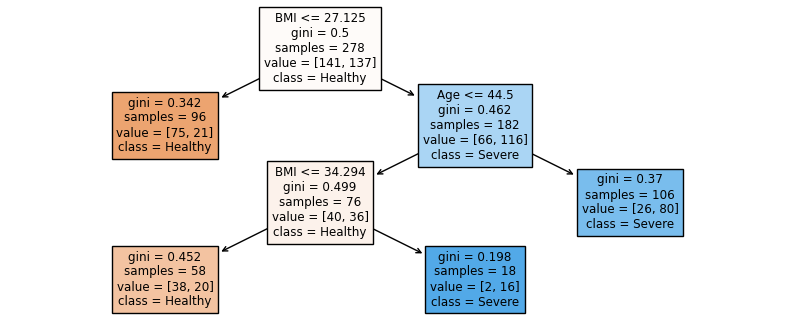

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(10,4))
_ = tree.plot_tree(model,
                   feature_names = columns,
                   class_names = ['Healthy', 'Severe'],
                   filled=True)


In [ ]:
! pip install dtreeviz

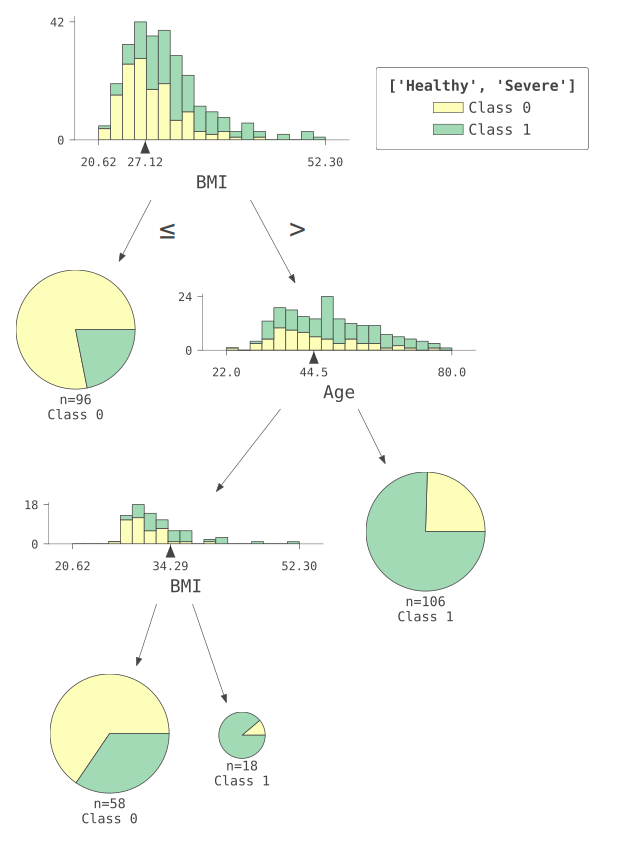

In [ ]:
import dtreeviz


viz = dtreeviz.model(model,
               X,
               y,
               target_name= ['Healthy', 'Severe'],  # this name will be displayed at the leaf node
               feature_names = columns,
              )

viz.view(scale=2,fontname="monospace")


# You can read more about using Dtreeviz at:
https://www.tensorflow.org/decision_forests/tutorials/dtreeviz_colab

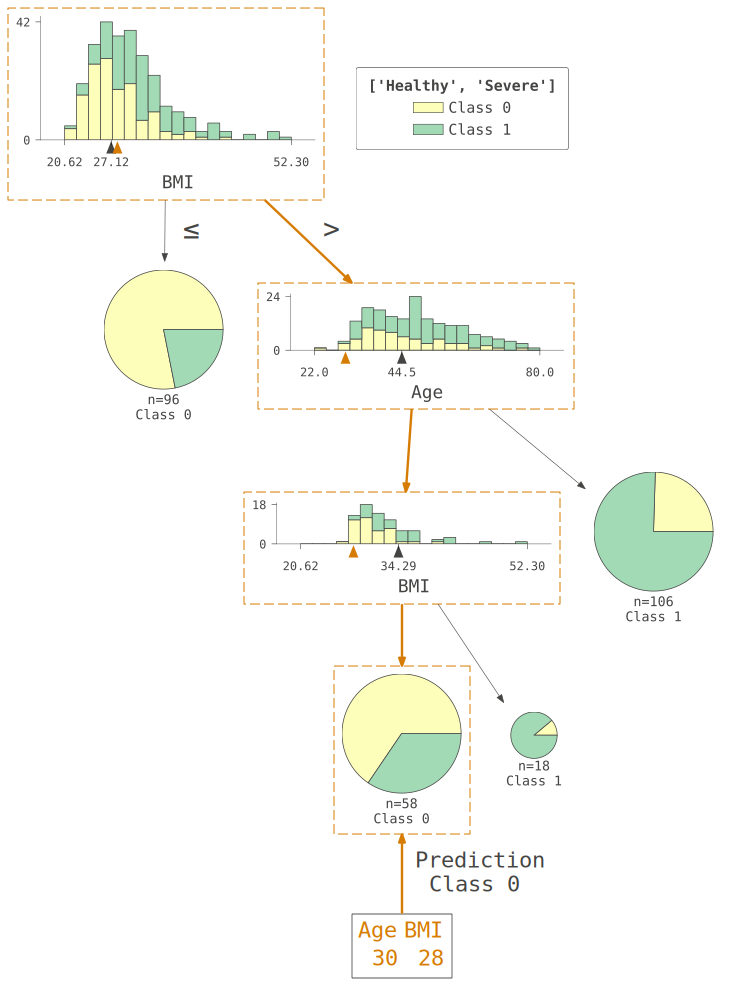

In [ ]:
# FOR EXAMPLE: how to visualize a given data X[index] or a given (Age,BMI) (30,24)

viz.view(x=(30,28), scale=2,fontname="monospace")


# You can try using <font color=magenta>Bayesian Optimization </font>

https://machinelearningmastery.com/scikit-optimize-for-hyperparameter-tuning-in-machine-learning/